In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = 'cardiographic.csv'
df = pd.read_csv(file_path)

df.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [3]:
print("Missing Values:\n", df.isnull().sum())

df.fillna(df.median(numeric_only=True), inplace=True)
print("Data Types:\n", df.dtypes)

Missing Values:
 LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64
Data Types:
 LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object


In [4]:
for col in df.select_dtypes(include=['object']).columns:
    try:
        df[col] = df[col].astype(float)
    except ValueError:
        print(f"Column {col} cannot be converted to float")

In [5]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df.clip(lower=lower_bound, upper=upper_bound, axis=1)

In [6]:
summary = df.describe()
print("Statistical Summary:\n", summary)

summary.loc['IQR'] = summary.loc['75%'] - summary.loc['25%']
print("Statistical Summary with IQR:\n", summary)

Statistical Summary:
                 LB           AC           FM           UC           DL  \
count  2126.000000  2126.000000  2126.000000  2126.000000  2126.000000   
mean    133.290331     0.003132     0.001568     0.004362     0.001770   
std       9.930268     0.003828     0.002485     0.003001     0.002668   
min     105.000000    -0.008409    -0.003850    -0.005177    -0.004934   
25%     126.000000     0.000000     0.000000     0.001851     0.000000   
50%     133.000000     0.001634     0.000000     0.004484     0.000000   
75%     140.000000     0.005606     0.002567     0.006536     0.003289   
max     161.000000     0.014015     0.006416     0.013564     0.008224   

           DS      DP         ASTV         MSTV         ALTV         MLTV  \
count  2126.0  2126.0  2126.000000  2126.000000  2126.000000  2126.000000   
mean      0.0     0.0    46.981873     1.304644     6.691678     8.007471   
std       0.0     0.0    17.612745     0.781091    10.378400     5.047078   
min

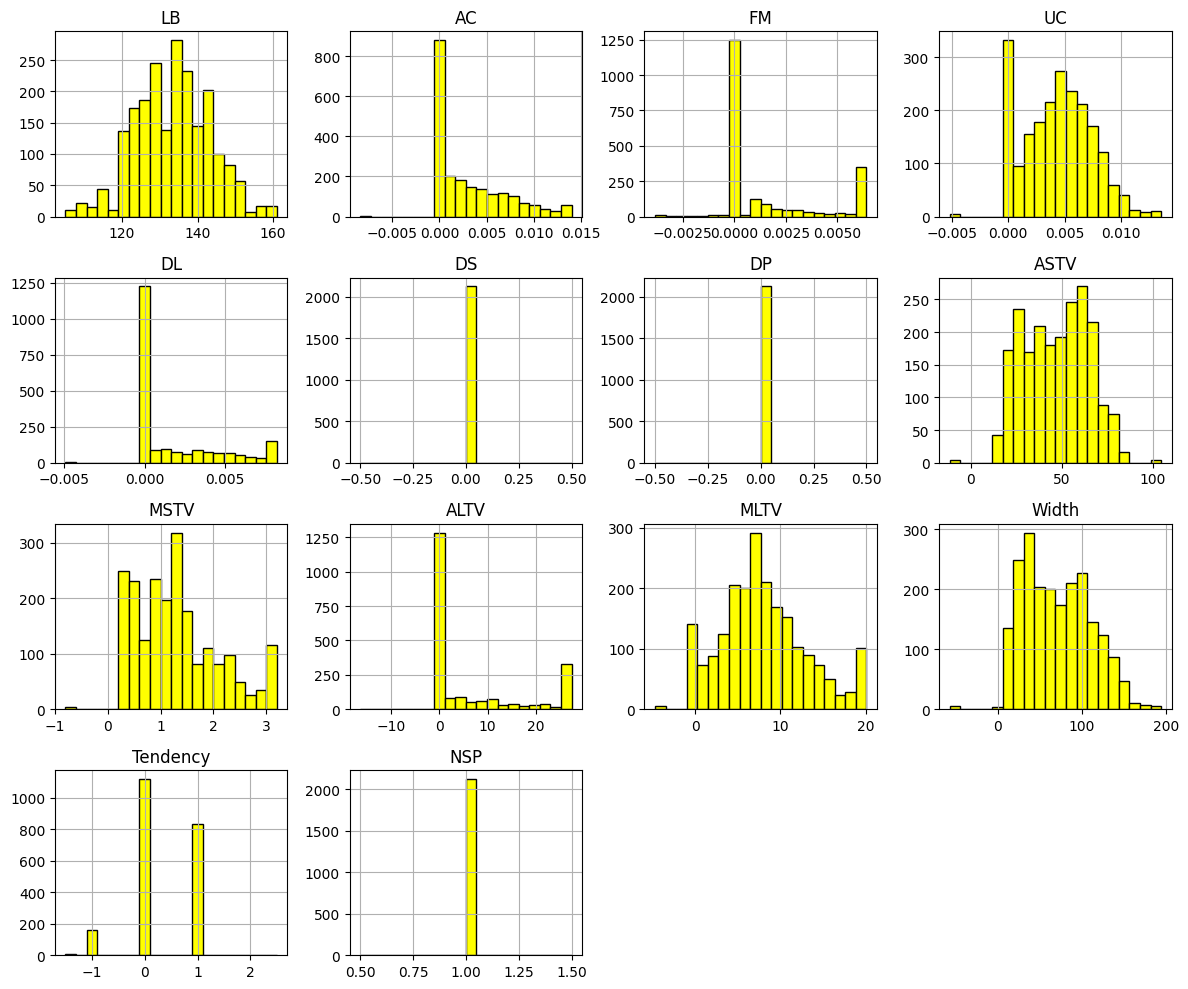

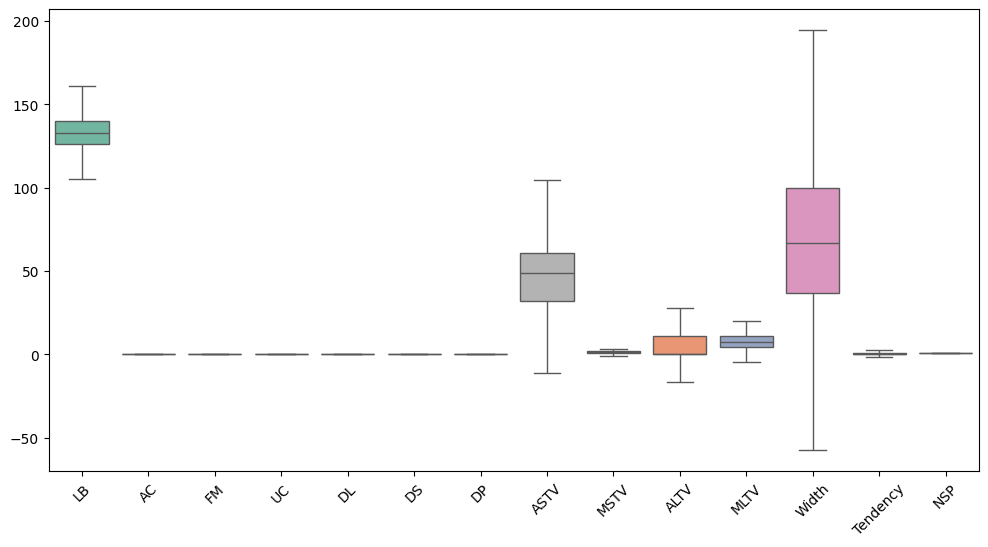

In [8]:
df.hist(figsize=(12, 10), bins=20, color='yellow', edgecolor='black')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, palette='Set2')
plt.xticks(rotation=45)
plt.show()

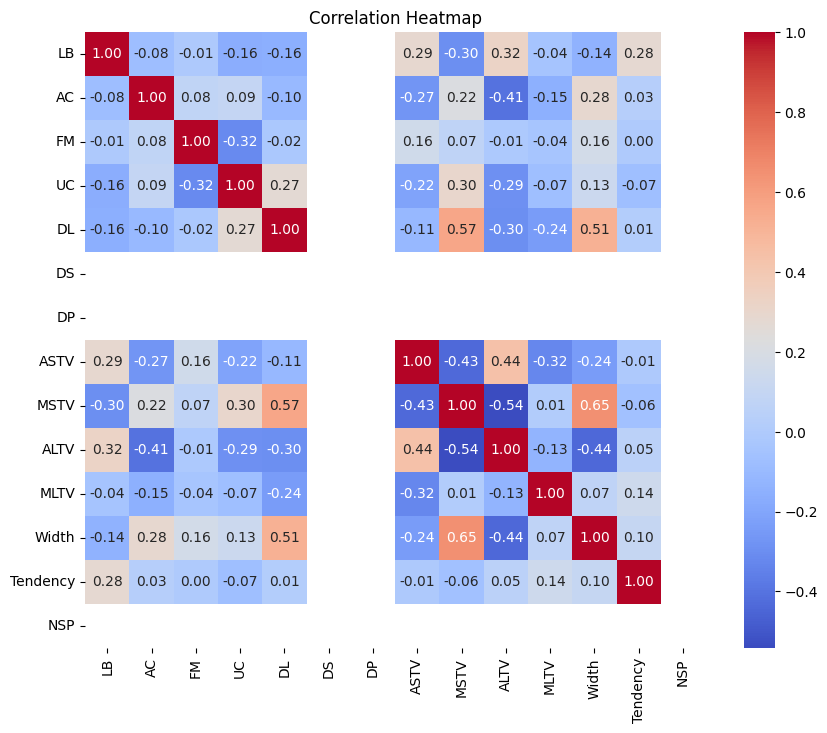

In [9]:
plt.figure(figsize=(10, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

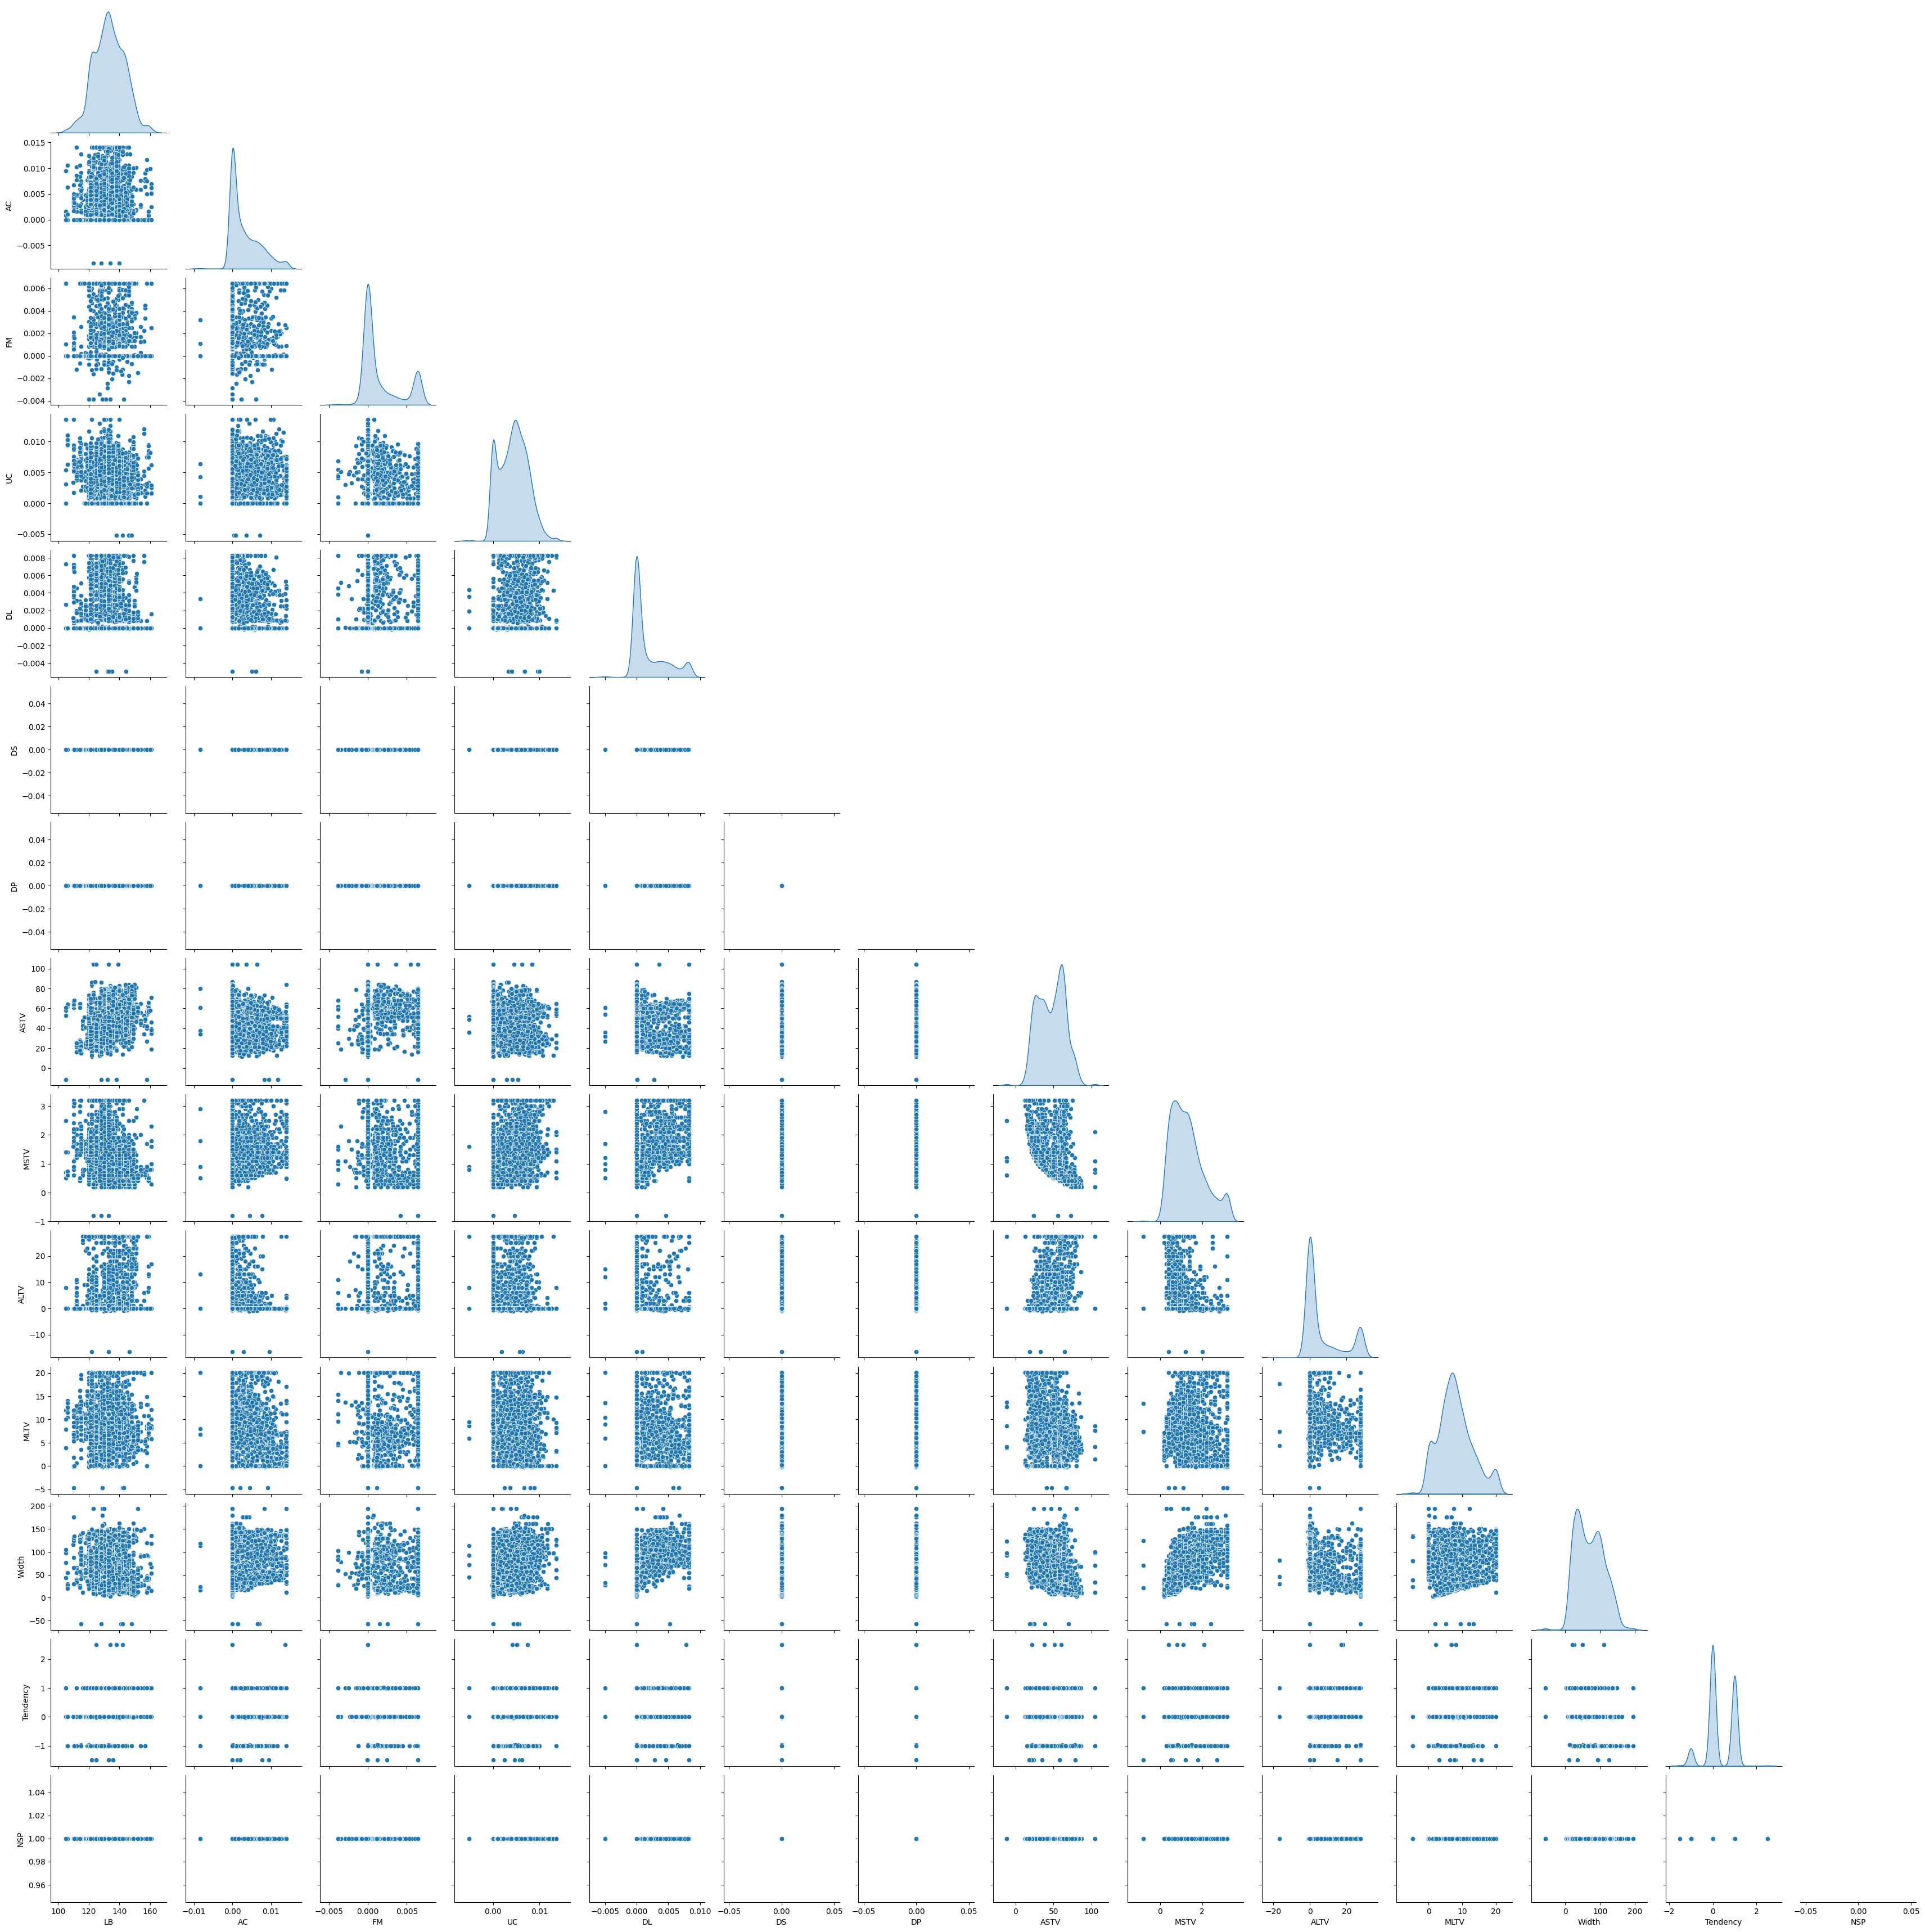

In [10]:
sns.pairplot(df, diag_kind='kde', corner=True)
plt.show()

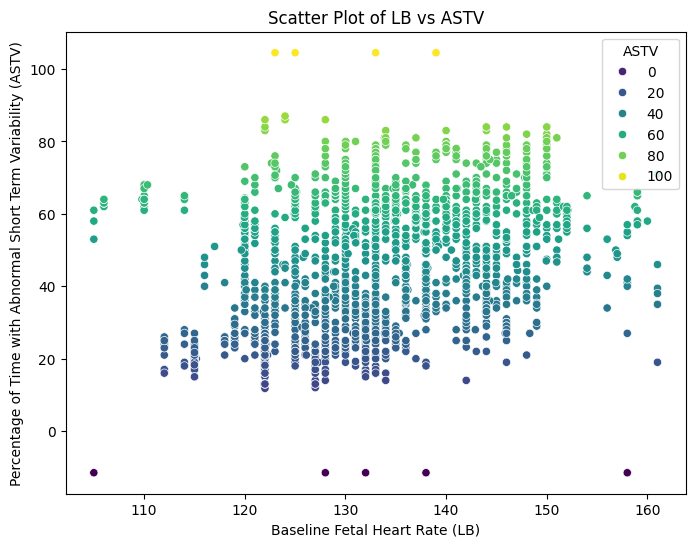

In [11]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='LB', y='ASTV', data=df, hue='ASTV', palette='viridis')
plt.title("Scatter Plot of LB vs ASTV")
plt.xlabel("Baseline Fetal Heart Rate (LB)")
plt.ylabel("Percentage of Time with Abnormal Short Term Variability (ASTV)")
plt.show()

In [12]:
high_corr = corr_matrix[(corr_matrix > 0.7) | (corr_matrix < -0.7)]
print("Highly Correlated Variables:\n", high_corr)

if 'Time' in df.columns:
    df['Time'] = pd.to_datetime(df['Time'])
    plt.figure(figsize=(10, 6))
    sns.lineplot(x='Time', y='LB', data=df, marker='o', color='blue')
    plt.title("Trend of Baseline Fetal Heart Rate Over Time")
    plt.show()

Highly Correlated Variables:
            LB   AC   FM   UC   DL  DS  DP  ASTV  MSTV  ALTV  MLTV  Width  \
LB        1.0  NaN  NaN  NaN  NaN NaN NaN   NaN   NaN   NaN   NaN    NaN   
AC        NaN  1.0  NaN  NaN  NaN NaN NaN   NaN   NaN   NaN   NaN    NaN   
FM        NaN  NaN  1.0  NaN  NaN NaN NaN   NaN   NaN   NaN   NaN    NaN   
UC        NaN  NaN  NaN  1.0  NaN NaN NaN   NaN   NaN   NaN   NaN    NaN   
DL        NaN  NaN  NaN  NaN  1.0 NaN NaN   NaN   NaN   NaN   NaN    NaN   
DS        NaN  NaN  NaN  NaN  NaN NaN NaN   NaN   NaN   NaN   NaN    NaN   
DP        NaN  NaN  NaN  NaN  NaN NaN NaN   NaN   NaN   NaN   NaN    NaN   
ASTV      NaN  NaN  NaN  NaN  NaN NaN NaN   1.0   NaN   NaN   NaN    NaN   
MSTV      NaN  NaN  NaN  NaN  NaN NaN NaN   NaN   1.0   NaN   NaN    NaN   
ALTV      NaN  NaN  NaN  NaN  NaN NaN NaN   NaN   NaN   1.0   NaN    NaN   
MLTV      NaN  NaN  NaN  NaN  NaN NaN NaN   NaN   NaN   NaN   1.0    NaN   
Width     NaN  NaN  NaN  NaN  NaN NaN NaN   NaN   NaN   Na

In [13]:
df.to_csv('cleaned_cardiographic.csv', index=False)